In [3]:
import numpy as np 

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process.kernels import Matern, WhiteKernel

np.random.seed(1)

In [4]:
def FEM_MODEL(aspect_ratio, wind_angle, wind_speed, design_speed, roof_type):
    
    height_width_ratio = height / width
    
    damage = abs(np.cos(wind_angle))*wind_speed**2*height_width_ratio
                 
    if roof_type.lower() == "gable":
        return(damage/ design_speed**2)
               
    elif roof_type.lower() == "hip":              
        return(damage / design_speed**2 / 1.5)
    pass

In [5]:
width      = 50        # feet
height     = 10        # feet

wind_angle = 0         # radians

design_speed = 120 # miles per hour

roof_type    = "Gable"

possible_wind_speeds = np.arange(0, 200)

possible_damages     = [FEM_MODEL(width, height, wind_angle, V, design_speed, roof_type) for V in possible_wind_speeds]

possible_damages_hip  = [FEM_MODEL(width, height, wind_angle, V, design_speed, "hip") for V in possible_wind_speeds]

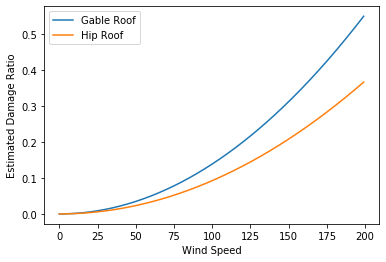

In [9]:
plt.plot(possible_wind_speeds, possible_damages, label = "Gable Roof")
plt.plot(possible_wind_speeds, possible_damages_hip, label = "Hip Roof")
plt.xlabel("Wind Speed")
plt.ylabel("Estimated Damage Ratio")
plt.legend()
plt.savefig("FEM_MODEL.pdf", dpi = 2000)
plt.show()

In [10]:
nPoints = 100
training_set = np.zeros([nPoints, 5])
training_set[:, 0] = np.random.uniform(low = 30, high = 60, size = nPoints)
training_set[:, 1] = np.random.uniform(low = 10, high = 30, size = nPoints)
training_set[:, 2] = np.random.uniform(low = 0,  high = 90, size = nPoints)
training_set[:, 3] = np.random.uniform(low = 0,  high = 250, size = nPoints)
training_set[:, 4] = np.random.uniform(low = 140, high = 160, size = nPoints)





In [11]:
def FEM_MODEL(simulation_parameters, roof_type = "gable"):
    width = simulation_parameters[:,0] 
    height =  simulation_parameters[:,1] 
    wind_angle =  simulation_parameters[:,2] 
    wind_speed =  simulation_parameters[:,3] 
    design_speed =  simulation_parameters[:,4] 
    height_width_ratio = height / width
    
    damage = abs(np.cos(wind_angle))*wind_speed**2*height_width_ratio
                 
    if roof_type.lower() == "gable":
        return(damage/ design_speed**2)
    elif roof_type.lower() == "hip":              
        return(damage / design_speed**2 / 1.5)
    pass

In [12]:
training_out = FEM_MODEL(training_set)

In [13]:
test_set = np.zeros([200, 5])
test_set[:,0] = 52
test_set[:,1] = 21
test_set[:,2] = 0.3
test_set[:,3] = np.linspace(0, 200, num = 200)
test_set[:,4] = 150

In [1]:
nPoints = 40
training_set = np.zeros([nPoints, 5])
training_set[:, 0] = np.random.uniform(low = 30, high = 60, size = nPoints)
training_set[:, 1] = np.random.uniform(low = 10, high = 30, size = nPoints)
training_set[:, 2] = np.random.uniform(low = 0,  high = 0.5*np.pi, size = nPoints)
training_set[:, 3] = np.random.uniform(low = 0,  high = 250, size = nPoints)
training_set[:, 4] = np.random.uniform(low = 140, high = 160, size = nPoints)

training_out = FEM_MODEL(training_set)

kernel = ConstantKernel() + RBF(length_scale = [5, 5, 0.1, 200, 1000]) + WhiteKernel(noise_level=0.0001)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 10)

gp.fit(training_set, training_out)

test_out, test_err = gp.predict(test_set, return_std = True)


NameError: name 'np' is not defined

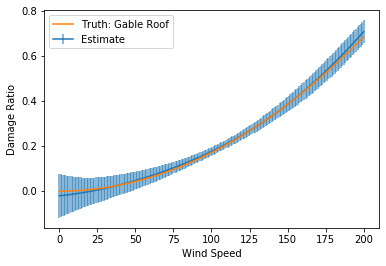

In [15]:
fig, ax = plt.subplots()
markers, caps, bars = ax.errorbar(test_set[:,3], test_out, yerr = 3*test_err, label = "Estimate", zorder = 0)
[bar.set_alpha(0.7) for bar in bars]
[cap.set_alpha(0.7) for cap in caps]
plt.plot(test_set[:,3], FEM_MODEL(test_set), label = "Truth: Gable Roof", zorder = 10)
plt.xlabel("Wind Speed")
plt.ylabel("Damage Ratio")
plt.legend(loc = "upper left")
plt.plot()
plt.show()

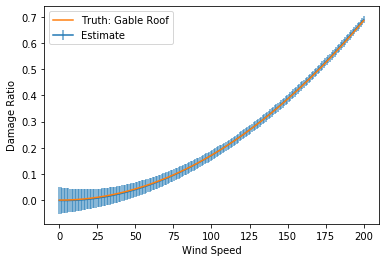

In [17]:
nPoints = 100
training_set = np.zeros([nPoints, 5])
training_set[:, 0] = np.random.uniform(low = 30, high = 60, size = nPoints)
training_set[:, 1] = np.random.uniform(low = 10, high = 30, size = nPoints)
training_set[:, 2] = np.random.uniform(low = 0,  high = 0.5*np.pi, size = nPoints)
training_set[:, 3] = np.random.uniform(low = 0,  high = 250, size = nPoints)
training_set[:, 4] = np.random.uniform(low = 140, high = 160, size = nPoints)

training_out = FEM_MODEL(training_set)

kernel = ConstantKernel() + RBF(length_scale = [5, 5, 0.1, 200, 1000]) + WhiteKernel(noise_level=0.0001)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 10)

gp.fit(training_set, training_out)

test_out, test_err = gp.predict(test_set, return_std = True)

fig, ax = plt.subplots()
markers, caps, bars = ax.errorbar(test_set[:,3], test_out, yerr = 3*test_err, label = "Estimate", zorder = 0)
[bar.set_alpha(0.7) for bar in bars]
[cap.set_alpha(0.7) for cap in caps]
plt.plot(test_set[:,3], FEM_MODEL(test_set), label = "Truth: Gable Roof", zorder = 10)
plt.xlabel("Wind Speed")
plt.ylabel("Damage Ratio")
plt.legend(loc = "upper left")
plt.plot()
plt.savefig("SURROGATE.pdf", dpi = 3000)
plt.show()

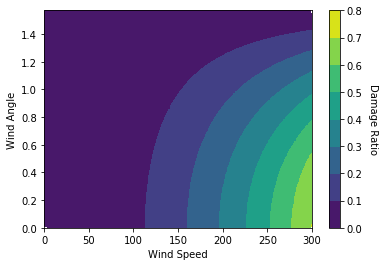

In [18]:
##### import matplotlib.mlab as ml
from scipy.interpolate import griddata
nPoints = 40000
training_set = np.zeros([nPoints, 5])
training_set[:, 0] = 50
training_set[:, 1] = 10
training_set[:, 2] = np.random.uniform(low = 0, high = 0.5*np.pi, size = nPoints)
training_set[:, 3] = np.random.uniform(low = 0, high = 300, size = nPoints)
training_set[:, 4] = 160

output = FEM_MODEL(training_set)

xi = np.linspace(0, 300, num = 500)
yi = np.linspace(0, 0.5*np.pi, num = 500)

X, Y = np.meshgrid(xi, yi)
Z = griddata((training_set[:,3], training_set[:,2]), output, (X, Y), method = 'linear')
plt.contourf(X,Y,Z)
cbar = plt.colorbar()
cbar.set_label('Damage Ratio', rotation=270, labelpad=15)
plt.xlabel("Wind Speed")
plt.ylabel("Wind Angle")
plt.savefig("angle_wind.pdf", dpi = 3000)
plt.show()

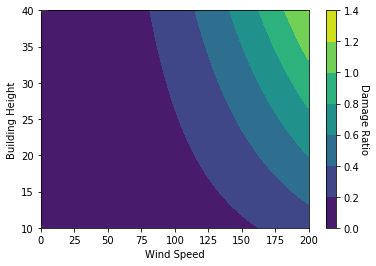

In [19]:
##### import matplotlib.mlab as ml
from scipy.interpolate import griddata
nPoints = 40000
training_set = np.zeros([nPoints, 5])
training_set[:, 0] = 50
training_set[:, 1] = np.random.uniform(low = 10, high = 40, size = nPoints)
training_set[:, 2] = 0.25
training_set[:, 3] = np.random.uniform(low = 0, high = 200, size = nPoints)
training_set[:, 4] = 160

output = FEM_MODEL(training_set)

xi = np.linspace(0, 200, num = 500)
yi = np.linspace(10, 40, num = 500)

X, Y = np.meshgrid(xi, yi)
Z = griddata((training_set[:,3], training_set[:,1]), output, (X, Y), method = 'linear')
plt.contourf(X,Y,Z)
cbar = plt.colorbar()
cbar.set_label('Damage Ratio', rotation=270, labelpad
               
               =10)
plt.xlabel("Wind Speed")
plt.ylabel("Building Height")
plt.savefig("height_wind.pdf", dpi = 3000)
plt.show()

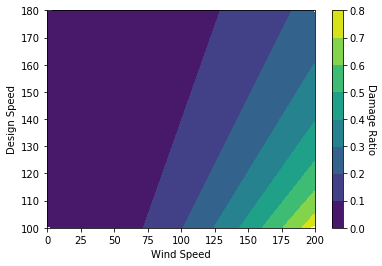

In [20]:
##### import matplotlib.mlab as ml
from scipy.interpolate import griddata
nPoints = 40000
training_set = np.zeros([nPoints, 5])
training_set[:, 0] = 50
training_set[:, 1] = 10
training_set[:, 2] = 0.25
training_set[:, 3] = np.random.uniform(low = 0, high = 200, size = nPoints)
training_set[:, 4] = np.random.uniform(low = 100, high = 180, size = nPoints)

output = FEM_MODEL(training_set)

xi = np.linspace(0, 200, num = 500)
yi = np.linspace(100, 180, num = 500)

X, Y = np.meshgrid(xi, yi)
Z = griddata((training_set[:,3], training_set[:,4]), output, (X, Y), method = 'linear')
plt.contourf(X,Y,Z)
c = plt.colorbar()
c.set_label("Damage Ratio", labelpad=10,rotation=-90)
plt.xlabel("Wind Speed")
plt.ylabel("Design Speed")
plt.savefig("design_wind.pdf", dpi = 3000)
plt.show()

In [23]:
class city():
    def __init__(self, design_load, enforcement_err, n_buildings):
        self.design_load  = design_load # MPH
        
        self.enforcement  = enforcement_err  # MPH^2 Standard deviation of design load
        
        self.n_structures = n_buildings
        
        self.widths       = np.random.uniform(low = 30, high = 60, size = self.n_structures)
        self.max_loads    = np.random.normal(self.design_load, self.enforcement, size = self.n_structures)
        self.heights      = np.random.uniform(low = 10, high = 15, size = self.n_structures)
        self.roof_type    = np.random.choice(["gable", "hip"], size = self.n_structures)
        pass
    
    def compute_storm_damage(self, storm_object):
        wind, angle = storm_object.compute_wind_speeds(self.n_structures)
        print(wind)
        print(angle)
        damages = self.FEM_MODEL(self.widths, self.heights, angle, wind, self.max_loads, self.roof_type)
        return(damages[0,:])
        
    def FEM_MODEL(self, width, height, wind_angle, wind_speed, design_speed, roof_type):
        height_width_ratio = height / width
        
        damage = abs(np.cos(wind_angle))*wind_speed**2*height_width_ratio
        n_samples = len(width)
        damages = np.zeros([1, n_samples])
        for iSample in range(n_samples):  
            if roof_type[iSample].lower() == "gable":
                damages[0, iSample] = damage[iSample]/ design_speed[iSample]**2
            elif roof_type[iSample].lower() == "hip":              
                damages[0, iSample] = damage[iSample] / design_speed[iSample]**2 / 1.5
        return damages
        

In [24]:
class storm():
    def __init__(self, sustained_wind, wind_variation):
        self.mean_sustained_wind = sustained_wind
        self.gust_standard_dev   = wind_variation
        pass
    
    def compute_wind_speeds(self, nStructures):
        wind_speeds = np.random.normal(self.mean_sustained_wind,self.gust_standard_dev,size = nStructures)
        wind_angle  = np.random.uniform(0, 0.5*np.pi, size = nStructures)
        return wind_speeds, wind_angle
    

In [25]:
Boston = city(160, 3, 100000)

Waltham = city(120, 15, 10000)

summer_storm = storm(40, 10)

damage = Boston.compute_storm_damage(summer_storm)

damage2 = Waltham.compute_storm_damage(summer_storm)

[35.69197612 57.52552305 37.40050093 ... 39.35083561 27.32289272
 45.68210264]
[1.0859943  0.51570666 0.0820244  ... 0.8619983  1.51222951 1.01293079]
[44.76020401 43.08606636 53.96685874 ... 39.2798599  33.06211222
 51.55725688]
[0.43410998 0.99210314 0.98580523 ... 0.52566587 0.71645319 0.8587269 ]


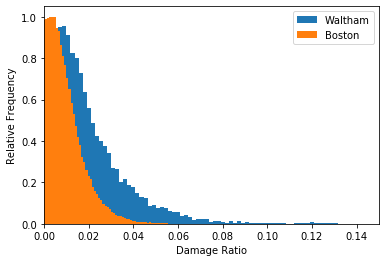

In [26]:
bin_height, bin_boundary = np.histogram(damage, bins = 100)
bin_height = bin_height/float(max(bin_height))
width = bin_boundary[1]-bin_boundary[0]

bin_height2, bin_boundary2 = np.histogram(damage2, bins = 100)
bin_height2 = bin_height2/float(max(bin_height2))
width2 = bin_boundary2[1]-bin_boundary2[0]

plt.bar(bin_boundary2[:-1],bin_height2,width = width2, label = 'Waltham')
plt.bar(bin_boundary[:-1],bin_height,width = width, label = 'Boston')
plt.legend(loc = 'upper right')
plt.ylabel("Relative Frequency")
plt.xlabel("Damage Ratio")
plt.xlim([0, 0.15])
plt.show()

In [2]:
class MCMC:
    def __init__(self, proposal_sampler, acceptance_probability_func):
        self.generate_proposal_sample = proposal_sampler
        self.compute_acceptance_prob  = acceptance_probability_func
        
        self.results        = None
        self.num_iterations = None
        self.num_dimensions = None
        
        pass
    def run(self, initial_sample, num_iterations):
        self.num_dimensions =  max(initial_sample.shape)
        self.num_iterations = num_iterations
        results             =  np.zeros([num_iterations + 1, self.num_dimensions])
        results[0, :]       = initial_sample 
        
        for i_iter in range(1, self.num_iterations):
            proposal = self.generate_proposal_sample(results[i_iter - 1, :])
            
            alpha    = self.compute_acceptance_prob(proposal, results[i_iter - 1, :])
            
            if np.log(np.random.uniform(0, 1) <= alpha):
                results[i_iter, :] = proposal
            else:
                results[i_iter, :] = results[i_iter - 1, :]
                
        self.results = results
        pass
    
    def plot_trace(self, dimension, xlab = None, ylab = None, label = None):
        from matplotlib import pyplot as plt
        if self.results is None:
            raise Exception("MCMC method run() has not been performed, no trace can be plotted")
        
        plt.plot(range(self.num_iterations + 1), self.results[:, dimension], label = label)
        pass
    
    def plot_hist(self, dimension, xlab = None, ylab = None, label = None):
        from matplotlib import pyplot as plt 
        plt.histogram(self.results[:, dimension])

In [3]:
def acceptance_probability(data, original_parameters, proposed_parameters, gp_model):

    proposed_log_density = norm.logpdf(damage, loc = mu, scale = std)
    proposed_log_density += uniform.logpdf(proposed_parameters[0,0], loc = 30, scale = 50)
    proposed_log_density += uniform.logpdf(proposed_parameters[0,1], loc = 10, scale = 20)
    proposed_log_density += uniform.logpdf(proposed_parameters[0,2], loc = 0, scale = np.pi/2)
    proposed_log_density += norm.logpdf(proposed_parameters[0,3], loc = 140, scale = 2)
    proposed_log_density += norm.logpdf(proposed_parameters[0,4], loc = 120, scale = 2)

    prob_ratio =  proposed_log_density - original_log_density

    return (min(np.log(1), prob_ratio))

In [4]:
def proposal_sampler(previous_state):
    aspect_ratio = np.random.normal(previous_state[0])

    wind_speed = np.random.normal(previous_state[1], scale = 0.5)
    
    wind_angle = np.random.normal(previous_state[2], scale = 0.05)

    design_speed = np.random.normal(previous_state[3], scale = 0.5)

    proposal = np.array([aspect_ratio, wind_speed, wind_angle, design_speed])
    return proposal.reshape(1, -1)